## **APPRENTISSAGE NON SUPERVISÉ BASÉ SUR LES VARIABLES COMMUNES**

## **TEST POUR 50 CLUSTERS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report
import warnings
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')


In [2]:
# Import dataset

file = "../DATAS/ANSTAT2021_dataset_Clean.csv"

In [3]:
df = pd.read_csv(file)
df_copy = df.copy()
df_copy

,agro_zone,region_name,department,city,milieu_resid,hhweight,resid,sex,age_num,lien,...,frigo,cuisin,ordin,decod,car,superf,bancarise,volhor_manquant,salaire_mois_manquant,Stg_formel
0,ABIDJAN,AUTONOME D'ABIDJAN,ABIDJAN,ABIDJAN,Urbain,1098.1172,Oui,Féminin,29,"Fils, Fille",...,Oui,Non,Non,Oui,Non,0.0,1,0,0,1
1,ABIDJAN,AUTONOME D'ABIDJAN,ABIDJAN,ABIDJAN,Urbain,1098.1172,Oui,Féminin,17,"Fils, Fille",...,Oui,Non,Non,Oui,Non,0.0,0,1,1,0
2,ABIDJAN,AUTONOME D'ABIDJAN,ABIDJAN,ABIDJAN,Urbain,1098.1172,Oui,Masculin,15,"Fils, Fille",...,Oui,Non,Non,Oui,Non,0.0,0,1,1,0
3,ABIDJAN,AUTONOME D'ABIDJAN,ABIDJAN,ABIDJAN,Urbain,1098.1172,Oui,Féminin,12,"Fils, Fille",...,Oui,Non,Non,Oui,Non,0.0,0,1,1,0
4,ABIDJAN,AUTONOME D'ABIDJAN,ABIDJAN,ABIDJAN,Urbain,1098.1172,Oui,Féminin,34,Conjoint ( e ),...,Oui,Non,Non,Oui,Non,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64469,CENTRE,MORONOU,M'BATTO,TIEMELEKRO,Rural,242.7796,Oui,Masculin,11,Neveu/Nièce,...,Non,Non,Non,Oui,Non,8566398.0,0,1,1,0
64470,CENTRE,MORONOU,M'BATTO,TIEMELEKRO,Rural,242.7796,Oui,Masculin,7,"Fils, Fille",...,Non,Non,Non,Oui,Non,8566398.0,0,1,1,0
64471,CENTRE,MORONOU,M'BATTO,TIEMELEKRO,Rural,242.7796,Oui,Masculin,10,Neveu/Nièce,...,Non,Non,Non,Oui,Non,8566398.0,0,1,1,0
64472,CENTRE,MORONOU,M'BATTO,TIEMELEKRO,Rural,242.7796,Oui,Masculin,4,"Fils, Fille",...,Non,Non,Non,Oui,Non,8566398.0,0,1,1,0


In [4]:
print("📊 Aperçu des données:")
print(df_copy.head())
print(f"\n📈 Forme des données: {df_copy.shape}")
print(f"\n🔍 Valeurs manquantes:\n{df_copy.isnull().sum()}")


📊 Aperçu des données:
  agro_zone         region_name department     city milieu_resid   hhweight  \
0   ABIDJAN  AUTONOME D'ABIDJAN    ABIDJAN  ABIDJAN       Urbain  1098.1172   
1   ABIDJAN  AUTONOME D'ABIDJAN    ABIDJAN  ABIDJAN       Urbain  1098.1172   
2   ABIDJAN  AUTONOME D'ABIDJAN    ABIDJAN  ABIDJAN       Urbain  1098.1172   
3   ABIDJAN  AUTONOME D'ABIDJAN    ABIDJAN  ABIDJAN       Urbain  1098.1172   
4   ABIDJAN  AUTONOME D'ABIDJAN    ABIDJAN  ABIDJAN       Urbain  1098.1172   

  resid       sex  age_num            lien  ... frigo cuisin ordin decod  car  \
0   Oui   Féminin       29     Fils, Fille  ...   Oui    Non   Non   Oui  Non   
1   Oui   Féminin       17     Fils, Fille  ...   Oui    Non   Non   Oui  Non   
2   Oui  Masculin       15     Fils, Fille  ...   Oui    Non   Non   Oui  Non   
3   Oui   Féminin       12     Fils, Fille  ...   Oui    Non   Non   Oui  Non   
4   Oui   Féminin       34  Conjoint ( e )  ...   Oui    Non   Non   Oui  Non   

  superf bancari

In [5]:
# 1. Variables communes
num_vars = ['age_num']
cat_vars = ['sex', 'city', 'marital_status', 'milieu_resid', 'region_name', 'bancarise']

In [6]:
# 2. Préparation pipeline prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_vars)
    ])

In [7]:
# 3. Prétraitement des données
X_processed = preprocessor.fit_transform(df_copy)
X_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 451318 stored elements and shape (64474, 488)>

In [8]:
# 4. Recherche du nombre optimal de clusters (k) avec méthode du coude et silhouette score
sse = []
silhouette_scores = []
K_range = range(2, 50)
best_k = None
best_score = -1
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_processed)
    sse.append(kmeans.inertia_)
    
    #silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))
    score = silhouette_score(X_processed, kmeans.labels_)
    silhouette_scores.append(score)

    # Mettre à jour meilleur score et k
    if score > best_score:
        best_score = score
        best_k = k

print(f"Meilleur nombre de clusters k={best_k} avec un score silhouette de {best_score:.4f}")

Meilleur nombre de clusters k=12 avec un score silhouette de 0.1517


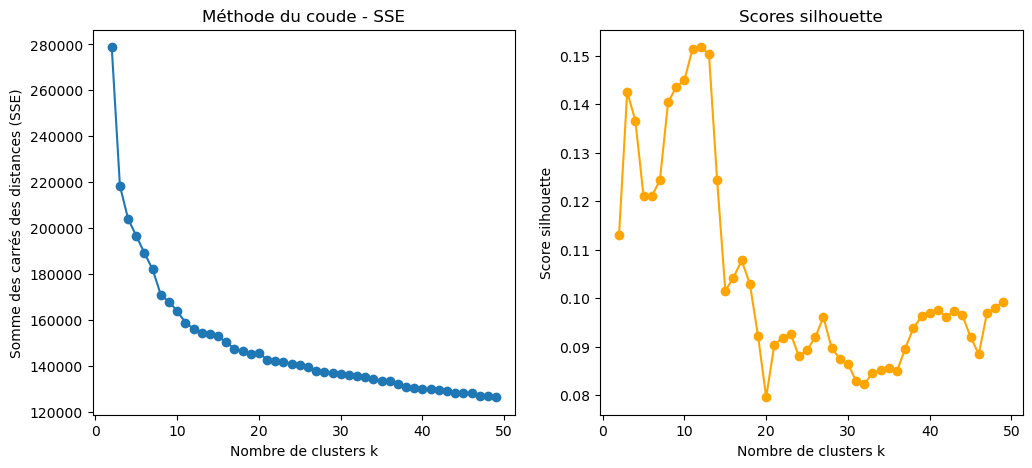

In [9]:
# Affichage méthode du coude
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.title('Méthode du coude - SSE')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Somme des carrés des distances (SSE)')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Scores silhouette')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Score silhouette')

plt.show()

In [10]:
# 5. Choisir k optimal et lancer clustering
k_optimal = best_k
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(X_processed)

In [ ]:
# Ajout des clusters au DataFrame
df_copy['cluster'] = clusters

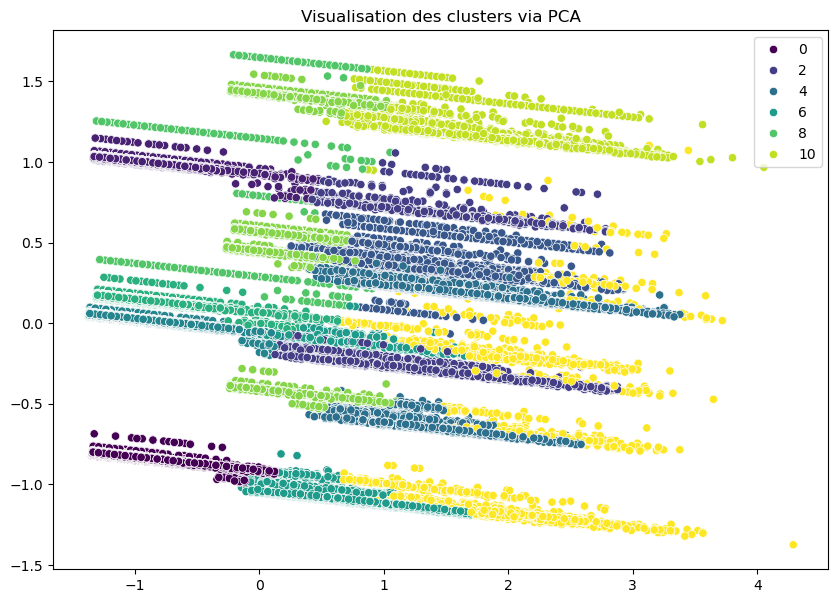

In [ ]:
# 6. Réduction dimensionnelle pour visualisation (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis')
plt.title('Visualisation des clusters via PCA')
plt.show()

In [ ]:
# 7. Résumé descriptif par cluster
cluster_summary = df_copy.groupby('cluster')[num_vars + cat_vars].agg(
    {
        'age_num': ['mean', 'median'],
        #'rev_total_mois': ['mean', 'median'],
        'sex': lambda x: x.mode()[0],
        'city': lambda x: x.mode()[0],
        'milieu_resid': lambda x: x.mode()[0],
        'region_name': lambda x: x.mode()[0],
        'marital_status': lambda x: x.mode()[0],
        'bancarise': lambda x: x.mode()[0]
    }
)

cluster_summary

age_num              sex                  city milieu_resid  \
              mean median  <lambda>              <lambda>     <lambda>   
cluster                                                                  
0         8.231481    7.0   Féminin  MAHANDIANA-SOKOURANI        Rural   
1         9.914400    9.0  Masculin                BOUAKE       Urbain   
2        47.536128   45.0  Masculin               ABIDJAN        Rural   
3        40.517420   39.0   Féminin               ABIDJAN       Urbain   
4        42.399673   41.0  Masculin             GNAMANGUI        Rural   
5         9.136179    8.0  Masculin  MAHANDIANA-SOKOURANI        Rural   
6        34.479225   34.0   Féminin  MAHANDIANA-SOKOURANI        Rural   
7         9.849564    9.0   Féminin                BOUAKE       Urbain   
8        15.613897   15.0   Féminin               ABIDJAN       Urbain   
9        24.102718   22.0  Masculin          YAMOUSSOUKRO       Urbain   
10       45.905172   44.0  Masculin               ABIDJAN       Urbain   
11       65.863503   64.0   Féminin               ABIDJAN        Rural   

                region_name marital_status bancarise  
                   <lambda>       <lambda>  <lambda>  
cluster                                               
0            HAUT-SASSANDRA    Célibataire         0  
1                    TONKPI    Célibataire         0  
2                    GUEMON       Marié(e)         0  
3        AUTONOME D'ABIDJAN       Marié(e)         1  
4                      NAWA       Marié(e)         1  
5            HAUT-SASSANDRA    Célibataire         0  
6            HAUT-SASSANDRA       Marié(e)         0  
7                     GBEKE    Célibataire         0  
8        AUTONOME D'ABIDJAN    Célibataire         0  
9              YAMOUSSOUKRO    Célibataire         1  
10       AUTONOME D'ABIDJAN       Marié(e)         1  
11                    GBEKE       Veuf(ve)         0

In [ ]:

























































eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee